Data extracted
lam*Sum_Pij =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.00425531914893617, 0.006382978723404255, 0.006382978723404255, 0.00425531914893617, 0.00425531914893617, 0.00425531914893617, 0.006382978723404255, 0.00851063829787234, 0.014893617021276596, 0.014893617021276596, 0.014893617021276596, 0.019148936170212766, 0.014893617021276596, 0.019148936170212766, 0.02340425531914894, 0.02553191489361702, 0.02553191489361702, 0.029787234042553193, 0.029787234042553193, 0.029787234042553193, 0.029787234042553193, 0.02340425531914894, 0.01276595744680851, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425]
w*err_det =  [0.8473725032803617, 0.5849132754061933, 0.5849132754061933, 0.023738056909670922, 0.021617673958483193, 0.023738056909670853, 0.058994713985506333, 0.11552301172026358, 0.021617673958483345, 0.09041716164515476, 0.058994713985506174, 0.024160929718294363, 0.02416092971828952, 0.19712415335814634, 0.19712415335814656, 0.25935546455037517, 0.2593

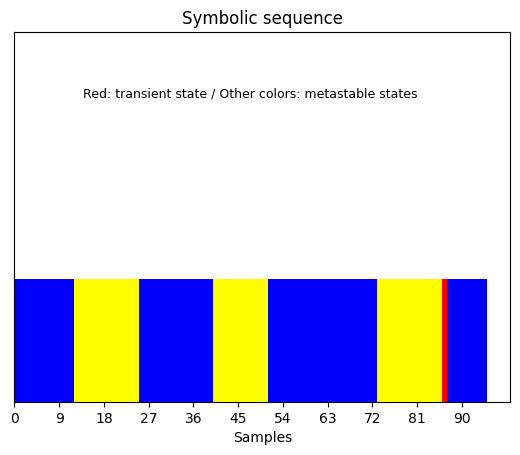

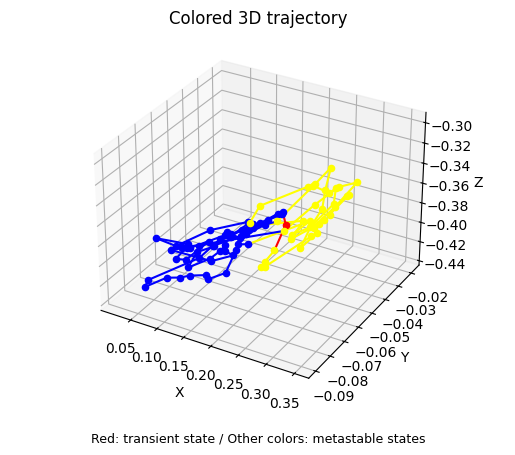

In [81]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import io
import os
import joblib

#---------------------------------------------------------------------------INITIALISATION------------------------------------------------------------------------------
#y=np.array([[0,0,0], [0,0,0], [0,0,0.1], [0,0,0.2], [0,0,0.3], [0,0,0.5], [0,0,2], [0,0,3.5], [0,0,5], [0,0,8], [0,0,10], [0,1,10], [0,0.5,10.5], [0,1,9.5], [0,0.5,10], [0,1,10], [0,3,10], [0,5,10], [0,7,10], [0,9.8,10], [0,9.8,10], [0,9.9,10], [0,9.95,10], [0,10,10], [0,10.1,10], [0,10,10], [0,10,9.9], [0,10,9.8], [0,10,9.5], [0,10,7.5], [0,10,6], [0,10,4], [0,10,2], [0,10,0.5], [0,10,0.2], [0,10,0.1], [0,10,0.05], [0,10,0], [0,9.8,0], [0,9.5,0], [0,8,0], [0,5,0], [0,3,0], [0,0.5,0], [0,0,0], [0,0,0], [0,0,0.1], [0,0,0.2], [0,0,0.3], [0,0,0.5], [0,0,0.5], [0,0,0.2], [0,0,2], [0,0,3.5], [0,0,5], [0,0,8], [0,0,10], [0,1,10], [0,0.5,10.5], [0,1,9.5], [0,0.5,10], [0,1,10], [0,3,10], [0,5,11], [0,7,10], [0,9.5,10], [0,9.8,10], [0,9.9,10], [0,9.95,10], [0,10,10], [0,10.1,10], [0,10,10], [0,10,9.8], [0,10,9.5], [0,10,8], [0,10,6], [0,10,4], [0,10,2], [0,10,0.5], [0,10,0.2], [0,10,0.1], [0,10,0.05], [0,10,0], [0,9.8,0], [0,9.5,0], [0,8,0], [0,5,0], [0,3,0], [0,0.5,0], [0,0,0], [0,0,0], [0,0,0],[0,0,0], [0,0,0], [0,0,0.1], [0,0,0.2], [0,0,0.3], [0,0,0.5], [0,0,2], [0,0,3.5], [0,0,5]])
data = joblib.load("data_20-01.json")
vidname = data["OAW01"]
#number_frame = input("\nHow many frames to analyze ? ")
#number_frame=int(number_frame)
data_final=np.array(vidname['joints3D'])
x = np.zeros((data_final.shape[1], data_final.shape[0], data_final.shape[2]))
for k in range(data_final.shape[1]):
    x[k,:,0]=data_final[:,k,2]
    x[k,:,1]=data_final[:,k,0]
    x[k,:,2]=data_final[:,k,1]
x[:, :, 2] *= -1
diagnosis = vidname['diag']
sex = vidname['sex']
print("Data extracted")
a_list = [13,14]
y = np.mean(x[a_list,25:120,:],axis = 0)


def opti_epsi_phi(y, step, visu=None, back_file=None):
    epsi = 0
    #step = 0.001
    D = cdist(y, y, 'euclidean')
    nbr_epsi = int(math.ceil(np.max(D))/step)


    Epsi = []
    trp = []
    detp = []
    tr_des = []
    det_des = []
    Sum_Pij = []
    
    #-----------------------------------------PHI FUNCTION-------------------------------------
    for e in range(nbr_epsi):
        sumpij=0
        epsi = epsi + step
        R = np.array(D<epsi)
        R=R.astype(int)

        #--------------------------------------------------------------
        #Rewriting grammar
        Serie=np.zeros((R.shape[1]))
        for i in range(R.shape[1]):
            Serie[i]=i+1
        for i in range(R.shape[0]):
            Indx = np.where(R[R.shape[0]-1-i, :]!=0)
            Valmin = 1000000000
            for k in Indx[0]:
                if Serie[k] <= Valmin:
                    Valmin = Serie[k]
            for j in Indx[0]:
                if Valmin <= Serie[j]:
                    Serie[Serie==Serie[j]] = Valmin
        #----------------------------------------------------------------
        #Writing zeros
        newSerie = np.array(Serie)
        for i in range(Serie.shape[0]):
            if i != 0 and i != Serie.shape[0]-1:
                if Serie[i-1]!=Serie[i] and Serie[i]!=Serie[i+1]:
                    newSerie[i]=0
            if i==0:
                if (Serie[i]!=Serie[i+1] and Serie[i]!=Serie[Serie.shape[0]-1]) and np.count_nonzero(Serie == Serie[i])==1:
                    newSerie[i]=0
            if i==Serie.shape[0]-1:
                if (Serie[i]!=Serie[i-1] and Serie[i]!=Serie[0]) and np.count_nonzero(Serie == Serie[i])==1:
                    newSerie[i]=0
        """
        for i in newSerie:
        if np.count_nonzero(newSerie == i) <= 2:
            newSerie[np.where(newSerie == i)] = 0
        """
        #----------------------------------------------------------
        #Writing continuous number's sequence
        sort = 1
        Ser = np.sort(newSerie)
        S = np.unique(Ser)
        for i in S:
            if i != 0:
                newSerie = np.where(newSerie == i, sort, newSerie)
                sort = sort+1
        serie = newSerie.astype(int)

        if len(np.unique(serie)) == 1 and np.unique(serie) == 1 :
            break
        else :
            if len(np.unique(serie))>2:
                Epsi.append(epsi)
                f = np.zeros((np.max(serie)+1, np.max(serie)+1))
                r=0
                q=0
                for i in range(len(serie)-1):
                    if serie[i] == 0 and serie[i+1]!=0:
                        r = r+1
                    elif serie[i] != 0 and serie[i+1] == 0:
                        q = q+1
                    f[serie[i], serie[i+1]] = f[serie[i], serie[i+1]] + 1
                s = np.sum(f, axis=0)
                n = f.shape[0]
                P = np.zeros((n, n))
                for i in range(n):
                    for j in range(n):
                        if s[j] != 0:
                            P[i,j] = f[i,j]/np.sum(f)
                        else:
                            P[i,j]=0
                for i in range(1,n):
                    for j in range(1,n):
                        if i!=j:
                            sumpij = sumpij+P[i,j]

                r=r/(len(Serie))
                q=q/(len(Serie))

                mat_des = np.zeros((n, n))
                for i in range(n):
                    mat_des[i, 0] = q if i != 0 else 1 - (n - 1) * q
                    mat_des[0, i] = r if i != 0 else 1 - (n - 1) * q
                    mat_des[i, i] = 1 - r if i != 0 else 1 - (n - 1) * q

                trp.append(np.trace(P)) 
                detp.append(np.linalg.det(P))
                tr_des.append(np.trace(mat_des))
                det_des.append(np.linalg.det(mat_des))
                Sum_Pij.append(sumpij)

    err_det = [abs(alpha - beta) for alpha, beta in zip(det_des, detp)]
    err_tr = [abs(alpha - beta) for alpha, beta in zip(tr_des, trp)]
    mean_err_det = sum(err_det)/len(err_det)
    mean_err_tr = sum(err_tr)/len(err_tr)
    mean_Sum_Pij = sum(Sum_Pij)/len(Sum_Pij)
    #w2 = mean_err_tr/mean_err_det
    #lam=mean_err_tr/mean_Sum_Pij
    w1=0.22
    w2=1
    lam=0.2
    phi = [w1*alpha + w2*beta + lam*gamma for alpha, beta, gamma in zip(err_tr, err_det,Sum_Pij)]
    print('lam*Sum_Pij = ',[x * lam for x in Sum_Pij])
    print('w*err_det = ',[x * w2 for x in err_det])
    print('err_tr = ',[x * w1 for x in err_tr])
    phi_opti = min(phi)
    indices = [i for i in range(len(phi)) if phi[i] == phi_opti]
    opti_epsi = [round(Epsi[i],3) for i in indices]


    #-----------------------------------------COMBINE PHI FUNCTION WITH ENTROPY FUNCTION-------------------------------------
    count = 0
    Entropy = np.zeros(len(opti_epsi))
    for e in opti_epsi:
        R = np.array(D<e)
        R=R.astype(int)

        #------------------------------------------------------
        #Rewriting grammar
        Serie=np.zeros((R.shape[1]))

        for i in range(R.shape[1]):
            Serie[i]=i+1

        for i in range(R.shape[0]):
            Indx = np.where(R[R.shape[0]-1-i, :]!=0)
            Valmin = 1000000000
            for k in Indx[0]:
                if Serie[k] <= Valmin:
                    Valmin = Serie[k]

            for j in Indx[0]:
                if Valmin <= Serie[j]:
                    Serie[Serie==Serie[j]] = Valmin

        #---------------------------------------------------------
        #Writing zeros
        newSerie = np.array(Serie)
        for i in range(Serie.shape[0]):
            if i != 0 and i != Serie.shape[0]-1:
                if Serie[i-1]!=Serie[i] and Serie[i]!=Serie[i+1]:
                    newSerie[i]=0
            if i==0:
                if (Serie[i]!=Serie[i+1] and Serie[i]!=Serie[Serie.shape[0]-1]) and np.count_nonzero(Serie == Serie[i])==1:
                    newSerie[i]=0
            if i==Serie.shape[0]-1:
                if (Serie[i]!=Serie[i-1] and Serie[i]!=Serie[0]) and np.count_nonzero(Serie == Serie[i])==1:
                    newSerie[i]=0
        
        for i in newSerie:
            if np.count_nonzero(newSerie == i) <= 2:
                newSerie[np.where(newSerie == i)] = 0
        
        #----------------------------------------------------
        #Writing continuous number's sequence
        sort = 1
        Ser = np.sort(newSerie)
        S = np.unique(Ser)
        for i in S:
            if i != 0:
                newSerie = np.where(newSerie == i, sort, newSerie)
                sort = sort+1

        #Entropy
        Serie=newSerie
        Serie = Serie.astype(int)
        p = np.array(np.unique(Serie).shape[0])
        H=0
        occurrences = np.bincount(Serie)
        for valeur, nb_occurrences in enumerate(occurrences):
            if nb_occurrences > 0:
                pi = nb_occurrences/Serie.shape[0]
                H=H+pi*np.log2(pi)

        Hneg = -H
        Entropy[count]= Hneg
        count=count+1

    # Results epsilon
    Hmax = np.max(Entropy)
    IndxHmax = np.argmax(Entropy)
    EpsiOptiH = opti_epsi[IndxHmax]
    print('Optimal epsilon = ',EpsiOptiH," : ",Hmax)
    return EpsiOptiH


      
EpsiOptiH = opti_epsi_phi(y, 0.001, 1)
#------------------------------------------------------------TEST OF THE OPTIMAL EPSILON---------------------------------------------------------------------------
D = cdist(y, y, 'euclidean')
R = np.array(D<EpsiOptiH)
R=R.astype(int)

#----------------------------------------------------
#Rewriting grammar
Serie=np.zeros((R.shape[1]))

for i in range(R.shape[1]):
    Serie[i]=i+1

for i in range(R.shape[0]):
    Indx = np.where(R[R.shape[0]-1-i, :]!=0)
    Valmin = 1000000000
    for k in Indx[0]:
        if Serie[k] <= Valmin:
            Valmin = Serie[k]

    for j in Indx[0]:
        if Valmin <= Serie[j]:
            Serie[Serie==Serie[j]] = Valmin

#-----------------------------------------------------
#Writing zeros
newSerie = np.array(Serie)
for i in range(Serie.shape[0]):
    if i != 0 and i != Serie.shape[0]-1:
        if Serie[i-1]!=Serie[i] and Serie[i]!=Serie[i+1]:
            newSerie[i]=0
    if i==0:
        if (Serie[i]!=Serie[i+1] and Serie[i]!=Serie[Serie.shape[0]-1]) and np.count_nonzero(Serie == Serie[i])==1:
            newSerie[i]=0
    if i==Serie.shape[0]-1:
        if (Serie[i]!=Serie[i-1] and Serie[i]!=Serie[0]) and np.count_nonzero(Serie == Serie[i])==1:
            newSerie[i]=0

for i in newSerie:
    if np.count_nonzero(newSerie == i) <= 2:
        newSerie[np.where(newSerie == i)] = 0

#-------------------------------------------------------------
#Writing continuous number's sequence
sort = 1
Ser = np.sort(newSerie)
S = np.unique(Ser)
for i in S:
    if i != 0:
        newSerie = np.where(newSerie == i, sort, newSerie)
        sort = sort+1

serie=newSerie

position = 0
palette = ['red', 'blue', 'yellow', 'green', 'purple', 'orange', 'black', 'pink', 'brown', 'gray', 'turquoise', 'indigo', 'beige', 'olive', 'cyan', 'magenta', 'gold', 'silver', 'coral', 'lavender', 'chartreuse', 'orangered', 'aquamarine', 'skyblue', 'pumpkin', 'emerald']

if len(palette) > np.max(serie):
    fig, ax = plt.subplots()
    ax.set_title("Symbolic sequence")
    for couleur in serie:
        ax.barh(y=0, width=1, color=palette[int(couleur)], height=0.2, left=position)
        position += 1

    ax.set_ylim(0, 0.3)
    ax.axis('off')
    
    
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_ylim(ax.get_ylim())
    ax2.set_xticks(np.arange(0, len(serie) + 1, int(len(serie)/10)))
    ax2.set_xticklabels(np.arange(0, len(serie) + 1, int(len(serie)/10)))
    ax2.tick_params(axis='x', which='both', bottom=True, top=False, labeltop = False, labelbottom=True)
    ax2.set_xlabel('Samples')
    ax2.xaxis.set_label_position('bottom')
    ax.text(int(serie.shape[0])/2, 0.25,"Red: transient state / Other colors: metastable states", fontsize=9, ha='center', va='center')

    plt.show(block=False)

    figure = plt.figure()
    plt.axis('off')
    plt.title("Colored 3D trajectory")
    ax = figure.add_subplot(111, projection='3d')
    ax.scatter(y[0, 0],y[0,1],y[0,2], color=palette[int(serie[0])], marker='o')
    for i in range(serie.shape[0]-1):
        ax.scatter(y[i+1, 0],y[i+1,1],y[i+1,2], color=palette[int(serie[i+1])], marker='o')
        if serie[i+1]==0:
            ax.plot(y[i:i+2, 0],y[i:i+2,1],y[i:i+2,2], color='red')
        else:
            ax.plot(y[i:i+2, 0],y[i:i+2,1],y[i:i+2,2], color=palette[int(serie[i])])
    ax.text2D(0.5, -0.1, "Red: transient state / Other colors: metastable states", transform=ax.transAxes, fontsize=9, ha='center', va='center')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show(block=False)
        